In [2]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('Spam SMS Collection.txt', sep='\t', names=['label', 'message'])

In [6]:
df.columns

Index(['label', 'message'], dtype='object')

In [7]:
df.shape

(5572, 2)

In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

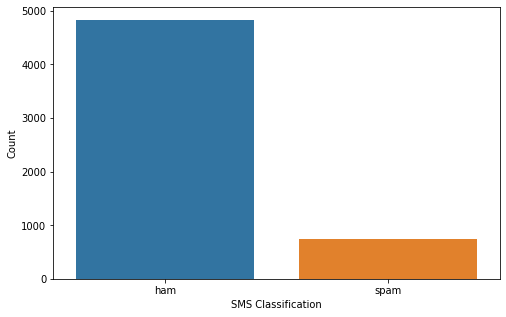

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')

In [11]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.message[i])
    message=message.lower()
    words=message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    message = ' '.join(words)
    corpus.append(message)

In [13]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [16]:
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 98.57%
Precision score is: 0.94
Recall score is: 0.96


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[946,   9],
       [  7, 153]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

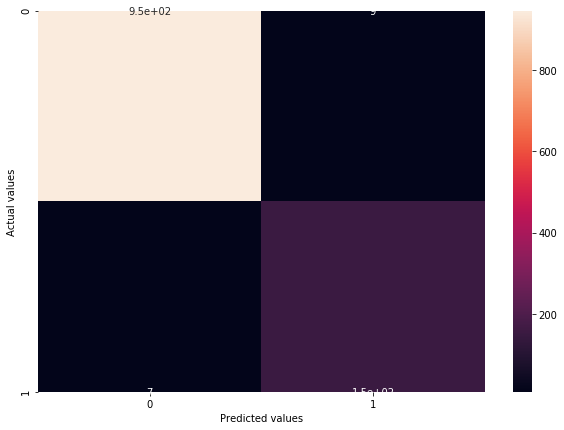

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [28]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('-----------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))
    


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy score for alpha=0.0 is: 98.3%
Accuracy score for alpha=0.1 is: 98.39%
Accuracy score for alpha=0.2 is: 98.57%
Accuracy score for alpha=0.3 is: 98.83%
Accuracy score for alpha=0.4 is: 98.83%
Accuracy score for alpha=0.5 is: 98.83%
Accuracy score for alpha=0.6 is: 98.83%
Accuracy score for alpha=0.7 is: 98.83%
Accuracy score for alpha=0.8 is: 98.83%
Accuracy score for alpha=0.9 is: 98.65%
Accuracy score for alpha=1.0 is: 98.57%
-----------------------------------------------
The best accuracy is 98.83% with alpha value as 0.3


In [29]:
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [31]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]', repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [32]:
sample_message = 'IMPORTANT - You could be entititled up to $3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('This is a SPAM Message!')
else:
    print('This is a Normal Message')

This is a SPAM Message!


In [33]:
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
    print('This is a SPAM Message!')
else:
    print('This is a normal message.')

This is a normal message.


In [34]:
sample_message = 'You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out next STOP'

if predict_spam(sample_message):
    print('This is a SPAM Message!')
else:
    print('This is a Normal Message')

This is a SPAM Message!
